In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import show_versions
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

In [5]:
show_versions()


System:
    python: 3.12.8 (tags/v3.12.8:2dc476b, Dec  3 2024, 19:30:04) [MSC v.1942 64 bit (AMD64)]
executable: D:\ML_AI\.venv\Scripts\python.exe
   machine: Windows-11-10.0.26200-SP0

Python dependencies:
      sklearn: 1.7.2
          pip: 25.1.1
   setuptools: 80.9.0
        numpy: 1.26.4
        scipy: 1.16.3
       Cython: None
       pandas: 2.3.3
   matplotlib: 3.10.7
       joblib: 1.5.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: D:\ML_AI\.venv\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: D:\ML_AI\.venv\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Cooperlake

       user_api

In [91]:
dt_cfl = LogisticRegression()

In [92]:
dt_cfl

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
svc_clf = SVC()
knn_clf = KNeighborsClassifier()


In [15]:
svc

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
weights=[0.5, 0.5]

In [31]:
X, y = make_classification(
        n_samples=1000,
        n_classes=len(weights),
        n_informative=len(weights),
        weights=weights,
        flip_y=0,
        random_state=1
    )

In [30]:
X[2]

array([-0.62607046,  0.81214787, -1.53191535, -0.38082437, -0.54013039,
        0.14231708,  0.2283045 ,  0.06365855,  0.25346349, -1.37102415,
       -0.63293859, -1.33579758, -2.04279998,  2.14729739, -0.05632689,
       -0.67962064,  0.11466112,  0.02515486, -0.06909132, -1.21465953])

In [33]:
X[3]

array([-0.27003579, -0.37210781, -1.140488  , -0.5791901 , -1.16362851,
        1.16828809,  1.35601977,  1.29525101, -1.75341347, -0.96462034,
        0.17432031, -0.29661553, -0.40143952, -1.58662272, -0.09615823,
       -1.04824202,  0.70012891, -0.71606254, -0.50138202, -0.48354891])

In [71]:
df_X = pd.DataFrame(X, columns=[f'feature{i}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=['label'])

In [72]:
df_X


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
0,2.221909,0.807802,0.927339,-0.070094,-0.638715,-0.625338,-0.990550,0.269520,-0.352831,0.707078,-0.637334,1.316802,1.958895,-0.206349,1.431720,-0.767452,-0.075525,-2.864634,0.727620,-1.278130
1,-0.183853,0.072078,0.108895,-0.230275,0.126486,-2.640619,0.466686,-0.200674,2.176379,1.431810,-0.001866,-1.160561,1.433353,0.911168,-0.925495,0.577990,0.614711,1.277095,0.397899,0.380486
2,-0.626070,0.812148,-1.531915,-0.380824,-0.540130,0.142317,0.228305,0.063659,0.253463,-1.371024,-0.632939,-1.335798,-2.042800,2.147297,-0.056327,-0.679621,0.114661,0.025155,-0.069091,-1.214660
3,-0.270036,-0.372108,-1.140488,-0.579190,-1.163629,1.168288,1.356020,1.295251,-1.753413,-0.964620,0.174320,-0.296616,-0.401440,-1.586623,-0.096158,-1.048242,0.700129,-0.716063,-0.501382,-0.483549
4,-0.286285,-0.210801,0.212339,-0.446445,-0.803471,-1.306725,-0.167858,-0.857692,-0.491583,-1.330638,0.119190,-2.155325,0.263040,-0.386946,1.806458,-0.353635,0.220540,-0.664314,-0.979698,-0.090187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.228973,2.009362,-1.337587,-0.315281,-1.153013,-0.319832,0.921625,-1.471066,-1.814726,1.785779,-1.563524,-0.657682,1.281235,-1.255936,-0.281530,-1.652669,0.133020,0.930704,0.000231,-2.983196
996,0.552988,0.839988,-0.553544,2.126596,0.071932,-0.818915,-0.840424,2.249522,-0.509866,-1.469819,-0.599663,0.375807,0.213101,0.816202,-2.258564,-0.056790,0.198285,-0.423507,-0.541073,-0.762027
997,-0.421712,-0.393626,0.951773,0.622981,-0.669641,-2.075664,1.110404,0.305029,-0.773816,-0.938604,0.089215,1.186398,1.905036,-1.244140,0.324049,-2.227633,-1.298183,-1.239348,-0.058853,-1.367342
998,-1.335056,-0.376535,0.816065,-1.747210,-0.813916,-0.851866,-1.141681,-1.015003,-0.614941,0.979415,0.343442,1.071549,-0.313444,0.477677,-0.782453,0.902692,-0.183231,1.728582,1.171279,1.012649


In [78]:
df_y.value_counts()

label
0        500
1        500
Name: count, dtype: int64

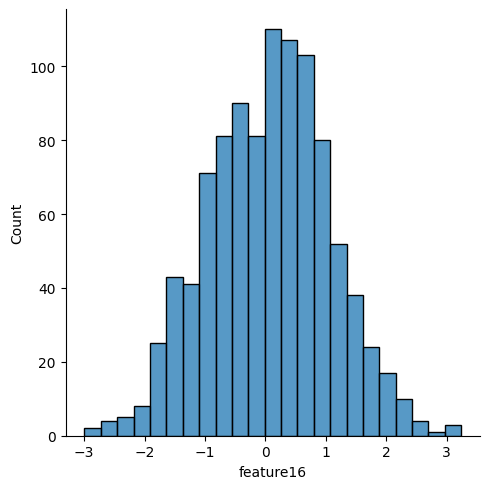

In [77]:
sns.displot(df_X['feature16'], kind='hist')


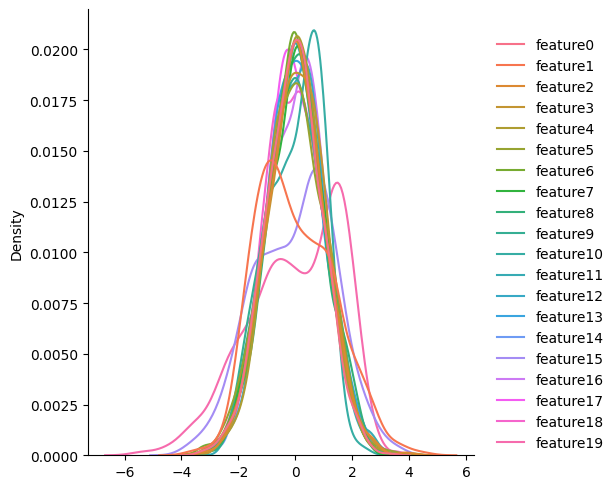

In [79]:
sns.displot(df_X, kind='kde')

In [100]:
def slit_data(data):
    fit_data = data[:int(len(data) * 0.6)]
    predict_data = data[int(len(data) * 0.8) : int(len(data) * 0.9)]
    score_data = data[int(len(data) * 0.9):]
    return (fit_data, predict_data, score_data)

In [101]:
split_X = slit_data(X)
split_y = slit_data(y)

In [108]:
split_X[0].shape

(600, 20)

In [103]:
dt_cfl.fit(split_X[0], split_y[0])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
dt_cfl.score(X=split_X[2], y=split_y[2])

0.86

In [105]:
dt_cfl.predict(X=split_X[1])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [106]:
split_y[1]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [118]:
df = pd.DataFrame({
    'predict': dt_cfl.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': dt_cfl.predict(X=split_X[1])==split_y[1]}
)

In [119]:
df['result'].value_counts()

result
True     83
False    17
Name: count, dtype: int64

In [125]:
df[df['result']==False]

,predict,labels,result
6,1,0,False
17,0,1,False
20,0,1,False
32,1,0,False
35,0,1,False
37,0,1,False
44,0,1,False
47,1,0,False
53,1,0,False
61,0,1,False


### dt_clf Score 0.86 Result 83